# HDSC WINTER '23 PREMIER PROJECT
## **TEAM OPTUNA**

## Title: ROAD ACCIDENTS DUE TO DRIVER VIOLATIONS (INDIA)
<p>
This dataset contains region wise records of road accidents from 2014 to 2016 in India, as a result of driver violations

<ul>
<li>sno: Serial number of the state/UT (Integer)</li>
<li>stateut: Name of the state/UT (String)</li>
<li>region: Region of the state/UT (String)</li>
<li>alcintake2014: Number of accidents due to alcohol intake in 2014 (Integer)</li>
<li>overspeed2014: Number of accidents due to overspeeding in 2014 (Integer)</li>
<li>overtaking2014: Number of accidents due to overtaking in 2014 (Integer)</li>
<li>lanejumping2014: Number of accidents due to lane jumping in 2014 (Integer)</li>
<li>asleep2014: Number of accidents due to sleeping at the wheel in 2014 (Integer)</li>
<li>othercause2014: Number of accidents due to miscellaneous causes in 2014 (Integer)</li>
<li>alcintake2016: Number of accidents due to alcohol intake in 2016 (Integer)</li>
<li>overspeed2016: Number of accidents due to overspeeding in 2016 (Integer)</li>
<li>lanejumping2016: Number of accidents due to lane jumping in 2016 (Integer)</li>
<li>overtaking2016: Number of accidents due to overtaking in 2016 (Integer)</li>
<li>asleep2016: Number of accidents due to sleeping at the wheel in 2016 (Integer)</li>
<li>othercause2016: Number of accidents due to miscellaneous causes in 2016 (Integer)</li>
</ul>
</p>

In [ ]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
%matplotlib inline

In [ ]:
# loading our dataset
drivers = pd.read_csv("/content/driverresponse.csv", index_col='sno')
drivers.head()

,index,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
sno,,,,,,,,,,,,,,,,,,,,
1,0,Andhra Pradesh,south,2,594,12747.0,507,328,668,29,154,1938,128,17286,40,667,325,1024,306,2868
2,1,Arunachal Pradesh,northeast,5,11,16.0,0,0,0,0,0,22,15,45,0,7,11,8,8,18
3,2,Assam,northeast,5,613,4596.0,129,104,156,7,3,628,352,3520,64,334,156,371,3,873
4,3,Bihar,north,1,1680,1496.0,278,236,308,7,72,439,593,2323,8,458,156,573,122,612
5,4,Chhattisgarh,centre,9,335,6720.0,188,313,266,10,81,520,145,6660,62,410,175,467,144,953


In [ ]:
# dropping the index column
drivers.drop(labels="index", axis=1, inplace=True)

In [ ]:
# checking for missing values
drivers.isna().sum()

stateut            0
region             0
regionid           0
alcintake2014      0
overspeed2014      1
overtaking2014     0
lanejumping2014    0
wrongside2014      0
signalavoid2014    0
asleep2014         0
othercause2014     0
alcintake2016      0
overspeed2016      0
signalavoid2016    0
wrongside2016      0
lanejumping2016    0
overtaking2016     0
asleep2016         0
othercause2016     0
dtype: int64

In [ ]:
# replacing the missing value in column 'overspeed2014' with the average value of that column
drivers['overspeed2014'].fillna(np.mean(drivers['overspeed2014']), inplace=True)
drivers.isna().sum()

stateut            0
region             0
regionid           0
alcintake2014      0
overspeed2014      0
overtaking2014     0
lanejumping2014    0
wrongside2014      0
signalavoid2014    0
asleep2014         0
othercause2014     0
alcintake2016      0
overspeed2016      0
signalavoid2016    0
wrongside2016      0
lanejumping2016    0
overtaking2016     0
asleep2016         0
othercause2016     0
dtype: int64

In [ ]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stateut          36 non-null     object 
 1   region           36 non-null     object 
 2   regionid         36 non-null     int64  
 3   alcintake2014    36 non-null     int64  
 4   overspeed2014    36 non-null     float64
 5   overtaking2014   36 non-null     int64  
 6   lanejumping2014  36 non-null     int64  
 7   wrongside2014    36 non-null     int64  
 8   signalavoid2014  36 non-null     int64  
 9   asleep2014       36 non-null     int64  
 10  othercause2014   36 non-null     int64  
 11  alcintake2016    36 non-null     int64  
 12  overspeed2016    36 non-null     int64  
 13  signalavoid2016  36 non-null     int64  
 14  wrongside2016    36 non-null     int64  
 15  lanejumping2016  36 non-null     int64  
 16  overtaking2016   36 non-null     int64  
 17  asleep2016       3

In [ ]:
drivers.describe()

,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
count,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,4.000000,525.444444,5950.60000,312.833333,283.361111,302.000000,37.000000,92.027778,1007.944444,413.722222,7453.916667,124.750000,490.388889,236.472222,823.527778,126.444444,1403.611111
std,2.746426,767.133866,8552.86602,514.513279,462.370115,389.184642,81.196411,234.019472,1780.826436,907.754202,11689.392631,225.198246,754.259534,454.375457,1477.494162,248.883501,1927.404966
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,11.750000,83.25000,1.500000,0.000000,6.250000,0.000000,0.000000,19.000000,24.000000,140.500000,0.000000,16.500000,0.000000,16.500000,0.000000,24.750000
50%,4.000000,82.500000,2662.00000,75.500000,86.500000,113.000000,4.500000,5.000000,156.000000,105.000000,2009.500000,9.500000,118.000000,65.500000,175.000000,7.500000,555.000000
75%,5.000000,706.500000,6379.50000,350.000000,316.750000,531.750000,34.500000,133.000000,810.000000,412.500000,10966.500000,117.750000,683.500000,199.750000,1020.250000,127.500000,1753.500000
max,9.000000,3540.000000,29790.00000,2171.000000,1869.000000,1529.000000,451.000000,1393.000000,6874.000000,4633.000000,47055.000000,1004.000000,3209.000000,2367.000000,7155.000000,1121.000000,6915.000000


In [ ]:
# Let's view our categrical columns
category_col = drivers.select_dtypes(include=['object', 'category']).columns
print(category_col)

Index(['stateut', 'region'], dtype='object')


In [ ]:
drivers['stateut'].unique(), drivers['region'].unique(), drivers['regionid'].unique()

(array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
        'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
        'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
        'Nagaland', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',
        'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
        'Uttar Pradesh', 'West Bengal', 'A & N Islands', 'Chandigarh',
        'D & N Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep',
        'Puducherry'], dtype=object),
 array(['south', 'northeast', 'north', 'centre', 'west', 'east',
        'northwest', 'southeast', 'southwest'], dtype=object),
 array([2, 5, 1, 9, 4, 3, 6, 7, 8]))

In [ ]:
# Let's view our numerical columns
numerical_col = [col for col in drivers.columns if col not in category_col]
print(numerical_col)

['regionid', 'alcintake2014', 'overspeed2014', 'overtaking2014', 'lanejumping2014', 'wrongside2014', 'signalavoid2014', 'asleep2014', 'othercause2014', 'alcintake2016', 'overspeed2016', 'signalavoid2016', 'wrongside2016', 'lanejumping2016', 'overtaking2016', 'asleep2016', 'othercause2016']


In [ ]:
drivers.groupby(['region']).sum()

,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
region,,,,,,,,,,,,,,,,,
centre,45,6091,39279.0,2283,2506,2508,234,491,9066,5228,53928,639,2600,1167,6446,919,8218
east,9,28,3886.0,281,186,235,107,49,1384,494,1900,90,110,53,184,29,6954
north,9,5481,22321.6,1122,1121,1808,239,498,3193,6404,23124,1651,4731,2377,6785,1722,11353
northeast,30,748,4731.0,129,104,182,7,3,771,498,3824,64,400,167,442,41,957
northwest,6,915,11395.0,102,1157,656,2,176,1803,673,13358,0,981,217,1345,222,5012
south,10,4325,85782.0,4975,3830,4220,683,1868,14015,1270,131206,1687,6120,3105,11444,1078,12932
southeast,7,25,94.0,7,20,11,0,0,0,27,124,2,31,0,15,0,39
southwest,8,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
west,20,1303,46732.0,2363,1277,1252,60,228,6054,300,40877,358,2681,1427,2986,541,5065


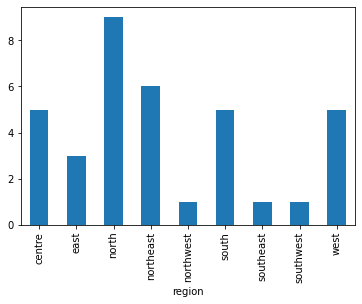

In [ ]:
# Let's know how many states are in each region
drivers.groupby('region')['stateut'].count().plot(kind='bar')

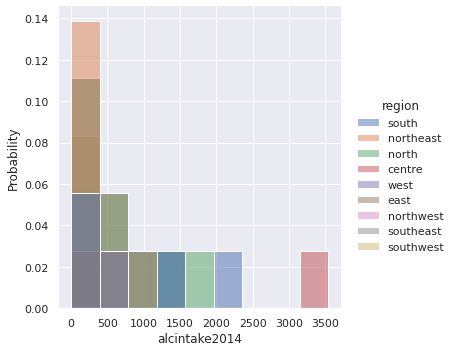

In [ ]:
sns.displot(data=drivers, x='alcintake2014', hue='region', stat='probability')

#### Comparing accident numbers triggered due to alcohol intake, overspeeding, overtaking, lane jumping & sleeping while driving etc. by regions

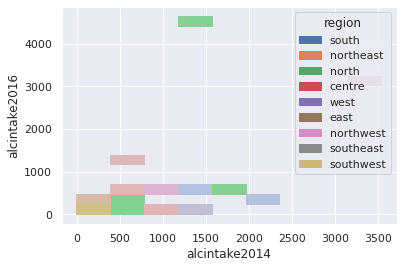

In [ ]:
sns.histplot(data=drivers, x='alcintake2014', y='alcintake2016', hue='region')

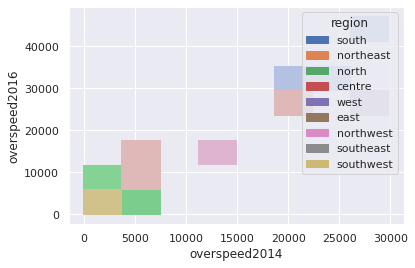

In [ ]:
sns.histplot(data=drivers, x='overspeed2014', y='overspeed2016', hue='region')

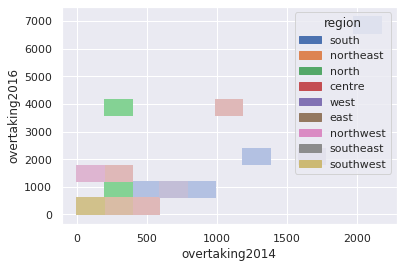

In [ ]:
sns.histplot(data=drivers, x='overtaking2014', y='overtaking2016', hue='region')

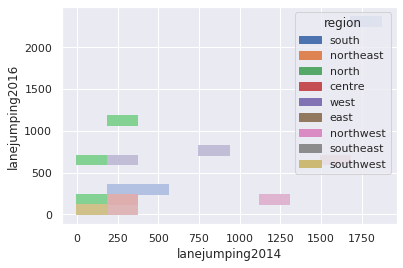

In [ ]:
sns.histplot(data=drivers, x='lanejumping2014', y='lanejumping2016', hue='region')

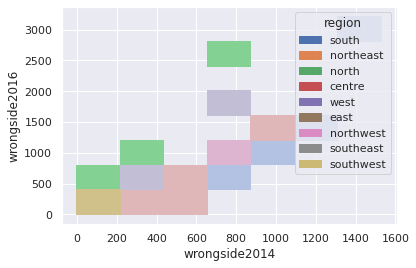

In [ ]:
sns.histplot(data=drivers, x='wrongside2014', y='wrongside2016', hue='region')

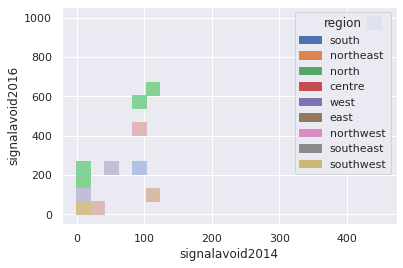

In [ ]:
sns.histplot(data=drivers, x='signalavoid2014', y='signalavoid2016', hue='region')

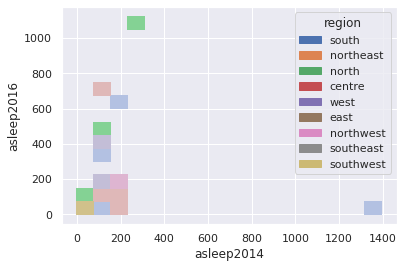

In [ ]:
sns.histplot(data=drivers, x='asleep2014', y='asleep2016', hue='region')

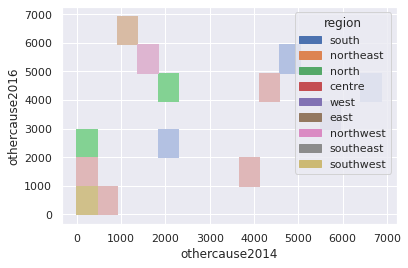

In [ ]:
sns.histplot(data=drivers, x='othercause2014', y='othercause2016', hue='region')

## **Preprocessing**
### Label Encoding
<p>Label encoding means converting the categorical columns into numerical columns so that we can train our model on it.</p>

In [ ]:
# import the encoder module
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
for i in category_col:
  drivers[i] = le.fit_transform(drivers[i])

In [ ]:
drivers.head()

,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
sno,,,,,,,,,,,,,,,,,,,
1,1,5,2,594,12747.0,507,328,668,29,154,1938,128,17286,40,667,325,1024,306,2868
2,2,3,5,11,16.0,0,0,0,0,0,22,15,45,0,7,11,8,8,18
3,3,3,5,613,4596.0,129,104,156,7,3,628,352,3520,64,334,156,371,3,873
4,4,2,1,1680,1496.0,278,236,308,7,72,439,593,2323,8,458,156,573,122,612
5,6,0,9,335,6720.0,188,313,266,10,81,520,145,6660,62,410,175,467,144,953


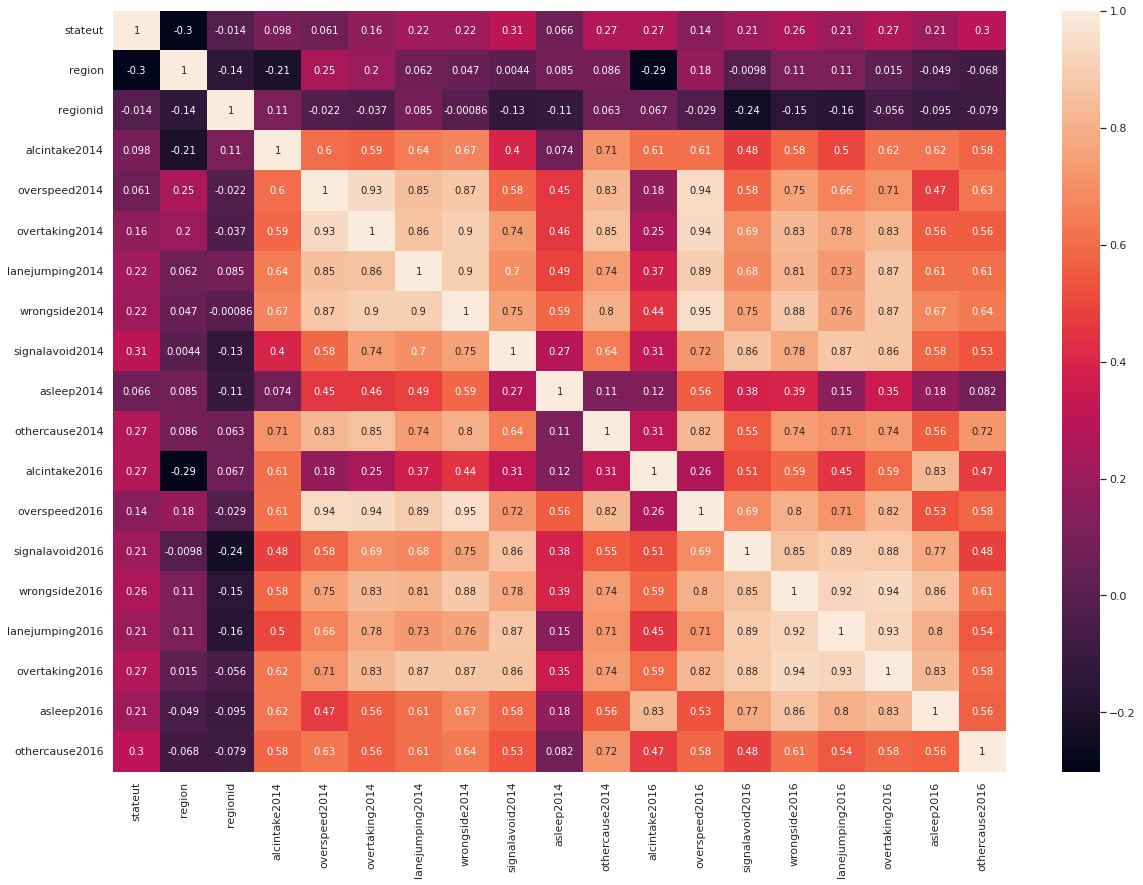

In [ ]:
# Let's visualize the correlations between the features.
fig, ax = plt.subplots(figsize=(20,14))
ax = sns.heatmap(drivers.corr(), annot=True)

In [ ]:
pd.DataFrame(drivers.groupby(['alcintake2014','alcintake2016'])['stateut'].sum())

stateut
alcintake2014 alcintake2016         
0             0                   18
              7                    8
              71                  21
              462                 35
1             0                    7
8             12                  29
9             3                   10
11            9                    5
              15                   2
12            5                   32
16            27                  23
25            27                   0
              35                  22
35            133                 17
42            64                  11
51            164                  9
73            82                  26
74            72                  13
91            13                  24
335           145                  6
388           47                  14
442           317                 27
508           40                  34
594           128                  1
611           543                 15
613           352                  3
637           1255                25
915           673                 28
968           202                 31
1095          529                 12
1232          4633                33
1251          226                 20
1416          531                 30
1680          593                  4
2207          396                 16
3540          3083                19

In [ ]:
drivers.groupby(['overspeed2014','overspeed2016'])['stateut'].sum()

overspeed2014  overspeed2016
0.0            57               21
1.0            0                18
16.0           45                2
21.0           8                 7
               29                8
28.0           45               29
40.0           146              22
48.0           14               23
51.0           11               24
94.0           124               0
               736              34
160.0          380               5
250.0          1297             26
499.0          413              32
1496.0         2323              4
1627.0         652              15
2253.0         2517             27
2561.0         10184            33
2763.0         516              13
2859.0         2428             14
3148.0         3883             10
3339.0         1473             35
3699.0         4984             25
4185.0         2344             12
4596.0         3520              3
5950.6         1696              9
6266.0         13615            31
6720.0         6660       

In [ ]:
drivers.groupby(['overtaking2014','overtaking2016'])['stateut'].sum()

overtaking2014  overtaking2016
0               0                 64
                5                  7
                8                  2
                17                29
                46                21
                56                32
                211                9
2               2                  8
7               15                 0
15              132               34
21              195               13
24              6                 23
33              80                10
60              585               27
67              18                14
68              155               15
83              0                  5
102             1345              28
129             371                3
136             71                26
188             467                6
206             1134              12
257             122               35
278             573                4
336             1194              25
392             3937              33
507    

In [ ]:
drivers.groupby(['lanejumping2014','lanejumping2016'])['stateut'].sum()

lanejumping2014  lanejumping2016
0                0                  170
                 11                   2
                 129                  9
2                0                    8
7                0                   32
8                0                   10
10               78                  13
20               0                    0
25               5                    5
29               2                   14
69               0                   34
104              156                  3
149              110                 15
179              53                  35
                 690                 12
211              194                 27
232              37                  31
236              156                  4
286              188                 25
313              175                  6
328              325                  1
362              1123                33
370              662                 11
455              292                 16
897    

In [ ]:
drivers.groupby(['wrongside2014','wrongside2016'])['stateut'].sum()

wrongside2014  wrongside2016
0              0                40
               5                 7
               7                 2
               20               29
               39               21
               131               9
1              2                31
8              90               26
11             31                0
17             17                5
26             0                24
29             15               32
43             21               13
58             14               14
61             19               10
99             105              34
127            512              27
156            334               3
205            93               35
221            169              15
266            410               6
308            458               4
393            913              12
394            733              11
519            565              25
570            156              31
656            981              28
668            667        

In [ ]:
drivers.groupby(['signalavoid2014','signalavoid2016'])['stateut'].sum()

signalavoid2014  signalavoid2016
0                0                  191
                 2                    0
                 10                   5
                 229                  9
1                0                   32
                 37                  15
2                0                   28
7                0                   34
                 8                    4
                 64                   3
9                97                  20
10               62                   6
12               9                   26
17               180                 27
22               52                  31
29               40                   1
51               261                 11
87               413                 19
92               406                 17
93               592                 12
99               228                 16
106              90                  35
114              75                  25
115              632                 33
451    

In [ ]:
drivers.groupby(['asleep2014','asleep2016'])['stateut'].sum()

asleep2014  asleep2016
0           0             200
            1               8
            2               7
            7              23
            8               2
            30             21
3           3               3
4           4              10
6           0              15
15          0              26
34          17             27
49          22             35
72          122             4
81          144             6
86          681            19
95          156            11
129         378            20
145         40             16
154         306             1
            462            12
157         14             31
161         80             25
            671            30
176         222            28
238         1121           33
1393        61             17
Name: stateut, dtype: int64

In [ ]:
drivers.groupby(['othercause2014','othercause2016'])['stateut'].sum()

othercause2014  othercause2016
0               0                 40
                28                32
                39                 0
                66                21
                1392              13
                2838               9
7               7                  5
10              27                 8
22              18                 2
25              0                 15
28              11                23
51              0                 29
65              4                  7
70              0                 24
72              70                34
86              50                17
153             498               27
159             247               10
283             904               11
292             1210              12
315             633               14
326             1375              25
417             193               26
439             612                4
520             953                6
628             873                3
1356   